<a href="https://colab.research.google.com/github/MinaAsghari/Data-Protection-and-Privacy/blob/main/Data_Protection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

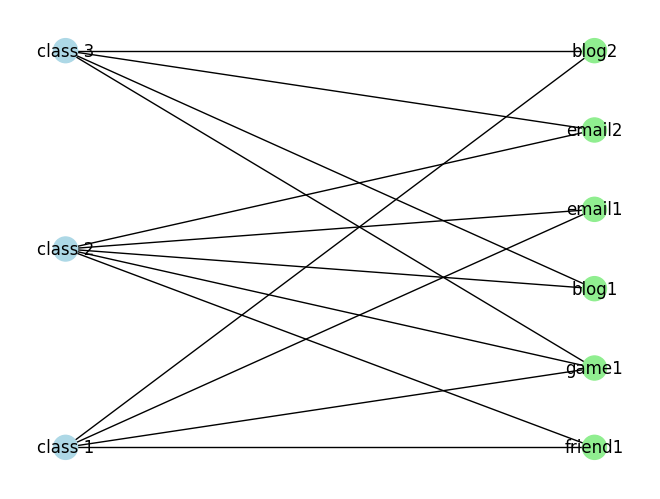

Class 1: ['v1', 'v3', 'v6']
Class 2: ['v2', 'v4']
Class 3: ['v5', 'v7']

Label List Assignment:
Class 1: ['label_0', 'label_1', 'label_2']
Class 2: ['label_0', 'label_1']
Class 3: ['label_0', 'label_1']

New Interaction List:
class 1: ['friend1', 'email1', 'game1', 'blog2']
class 2: ['blog1', 'friend1', 'email1', 'email2', 'game1']
class 3: ['blog1', 'game1', 'email2', 'blog2']


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Load the dataset
file_path = '/mnt/data/dataset2.csv'
data = pd.read_csv(file_path)

# Extract unique nodes and interactions
nodes = data['ID'].unique()
interactions = data.groupby('ID')['TARGET'].apply(set).to_dict()

# Build the interaction set for each node
for _, row in data.iterrows():
    interactions[row['ID']].add(row['TARGET'])

# Sort the nodes
nodes = sorted(nodes)

# Parameters
m = 3  # Maximum size of each class

# Function to check the safety condition
def safety_condition(cls, v):
    for member in cls:
        if member in interactions[v] or any(w in interactions[member] for w in interactions[v]):
            return False
    return True

# Function to create a new class
def create_new_class():
    return []

# Initialize classes
classes = []

# Greedy algorithm to partition nodes into classes
for v in nodes:
    flag = True
    for cls in classes:
        if safety_condition(cls, v) and len(cls) < m:
            cls.append(v)
            flag = False
            break
    if flag:
        new_class = create_new_class()
        new_class.append(v)
        classes.append(new_class)

# Function to assign label lists (dummy implementation)
def assign_label_listes(cls, all_label_listes):
    return {i: [f'label_{j}' for j in range(len(cls[i]))] for i in range(len(cls))}

# Assuming all_label_listes is predefined or obtained from somewhere
all_label_listes = []

# Assign label lists
label_list_assignment = assign_label_listes(classes, all_label_listes)

# Function to draw bipartite graph
def draw_bipartite_graph(classes, interaction_listes):
    G = nx.Graph()

    class_nodes = [f"class {i+1}" for i, _ in enumerate(classes)]
    interaction_nodes = set.union(*interaction_listes)  # Flatten the interaction list

    G.add_nodes_from(class_nodes, bipartite=0)
    G.add_nodes_from(interaction_nodes, bipartite=1)

    for i, cls in enumerate(classes):
        for node in cls:
            for interaction_node in interactions[node]:
                G.add_edge(f"class {i+1}", interaction_node)

    pos = nx.drawing.layout.bipartite_layout(G, class_nodes)
    nx.draw(G, pos, with_labels=True, node_color=['lightblue' if node.startswith('class') else 'lightgreen' for node in G.nodes()])
    plt.show()

# Prepare interaction_listes for drawing the graph
interaction_listes = [set.union(*(interactions[node] for node in cls)) for cls in classes]

# Draw the bipartite graph
draw_bipartite_graph(classes, interaction_listes)

# Display the resulting classes
for i, cls in enumerate(classes):
    print(f"Class {i+1}: {cls}")

# Display the label list assignment
print("\nLabel List Assignment:")
for cls_id, labels in label_list_assignment.items():
    print(f"Class {cls_id+1}: {labels}")

# Generate the new interaction list
new_interaction_list = {f"class {i+1}": list(set.union(*(interactions[node] for node in cls))) for i, cls in enumerate(classes)}

# Display the new interaction list
print("\nNew Interaction List:")
for cls, interactions in new_interaction_list.items():
    print(f"{cls}: {interactions}")
